In [1]:
%cd ../..

/home/eli/AnacondaProjects/epych


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import collections
import glob
import functools
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import quantities as pq

import epych
from epych.statistics import alignment, grand

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
CONDITIONS = ["go_gloexp", "go_seqctl", "gonaive", "lo_gloexp", "lonaive", "lo_rndctl", "igo_seqctl"]
PRETRIAL_SECONDS = 0.5
POSTTRIAL_SECONDS = 0.5

In [7]:
NWB_SUBJECTS = glob.glob('/mnt/data/DRAFT/000253/sub-*/')

In [8]:
PILOT_FILES = []

In [9]:
aligner = epych.statistics.alignment.AlignmentSummary.unpickle("/mnt/data/DRAFT/000253/visual_alignment")

In [10]:
PVALUE = 5e-2

In [11]:
CONTRASTS = [("logo", "lo_gloexp", "go_gloexp"), ("go_contrast", "go_gloexp", "go_seqctl"), ("lo_contrast", "lo_gloexp", "lo_rndctl"),
             ("ssa", "lo_gloexp", "igo_seqctl"), ("dd", "lo_rndctl", "lonaive"), ("gonaive_contrast", "gonaive", "go_seqctl")]

In [12]:
def initialize_grand_cluster_test(key, signals):
    area = os.path.commonprefix([loc for loc in signals[0].channels.location])
    return epych.statistics.grand.GrandNonparametricClusterTest(aligner.stats[area], alpha=PVALUE, partitions=1000)

In [13]:
summaries = {}

In [14]:
def location_prefix_signal_key(probe, signals):
    return alignment.location_prefix(probe, signals[0])

In [15]:
contrasts = {}

In [16]:
# for (contrast, condl, condr) in CONTRASTS:
#     summaries[contrast] = epych.statistic.Summary(location_prefix_signal_key, initialize_grand_cluster_test)
#     condl_lfps = epych.recording.Sampling.unpickle("/mnt/data/000253/grandcat_%s" % condl)
#     condr_lfps = epych.recording.Sampling.unpickle("/mnt/data/000253/grandcat_%s" % condr)
#     logging.info("Loaded cross-subject LFPs for contrast %s" % contrast)
#     contrast_signals = {k: (condl_lfps.signals[k], condr_lfps.signals[k]) for k in condl_lfps.signals.keys()}
#     summaries[contrast].calculate([contrast_signals])
#     contrasts[contrast] = summaries[contrast].results()
#     logging.info("Nonparametrically contrasted for %s" % contrast)
#     del condl_lfps, condr_lfps

In [17]:
subtractions = {}

In [18]:
for cond in CONDITIONS:
    subtractions[cond] = epych.recording.Sampling.unpickle("/mnt/data/DRAFT/000253/grandcat_4-3_%s" % cond)
    logging.info("Loaded cross-subject adaption-adjusted LFPs for condition %s" % cond)

INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition go_gloexp
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition go_seqctl
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition gonaive
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition lo_gloexp
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition lonaive
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition lo_rndctl
INFO:root:Loaded cross-subject adaption-adjusted LFPs for condition igo_seqctl


In [19]:
area_titles = {
    "VISal": "AL",
    "VISam": "AM",
    "VISl": "LM",
    "VISp": "V1",
    "VISpm": "PM",
    "VISrl": "RL",
}
def stattitle(name, signal):
    if name in area_titles:
        return area_titles[name]
    return name

In [20]:
ADAPTED_ONSET = pq.Quantity(-1.0) * pq.second
ADAPTED_OFFSET = pq.Quantity(-0.5) * pq.second
ODDBALL_ONSET = pq.Quantity(-1.9017372477960602e-14) * pq.second
ODDBALL_OFFSET = pq.Quantity(0.5004545430388676) * pq.second
EVENTS = {
    "Onset": (ODDBALL_ONSET.magnitude, 'lightgreen'),
    "Offset": (ODDBALL_OFFSET.magnitude, 'red'),
}

In [21]:
for (contrast, condl, condr) in CONTRASTS:
    summaries[contrast] = epych.statistic.Summary(location_prefix_signal_key, initialize_grand_cluster_test)
    contrast_signals = {k: (subtractions[condl].signals[k], subtractions[condr].signals[k]) for k in subtractions[condl].signals.keys()}
    summaries[contrast].calculate([contrast_signals])
    contrasts[contrast] = summaries[contrast].results()
    logging.info("Nonparametrically contrasted inner subtractions for %s" % contrast)

Found mislabelled VISal
stat_fun(H1): min=-4.7607872488697467e-07 max=243.39840698242188
Running initial clustering …
Found 1372 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-7.915241440059617e-07 max=405.1371154785156
Running initial clustering …
Found 302 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.6061092082964024e-06 max=246.02037048339844
Running initial clustering …
Found 140 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

/home/eli/miniforge3/envs/ephys/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


stat_fun(H1): min=-5.558541147365759e-07 max=571.5795288085938
Running initial clustering …
Found 296 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=0.0 max=904.0523681640625
Running initial clustering …
Found 187 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=0.0 max=489.4931335449219
Running initial clustering …
Found 210 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.1516567610669881e-06 max=203.07681274414062
Running initial clustering …
Found 153 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for logo


Found mislabelled VISal
stat_fun(H1): min=-2.952239412934432e-07 max=17.728878021240234
Running initial clustering …
Found 1620 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-6.130304086582328e-07 max=11.3995943069458
Running initial clustering …
Found 664 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-7.825649817050362e-08 max=12.810295104980469
Running initial clustering …
Found 220 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.0734507895904244e-06 max=19.515514373779297
Running initial clustering …
Found 592 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-8.807562608126318e-07 max=14.319779396057129
Running initial clustering …
Found 372 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-6.973796189413406e-07 max=12.67258358001709
Running initial clustering …
Found 482 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.926918227785791e-07 max=17.920425415039062
Running initial clustering …
Found 377 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for go_contrast


Found mislabelled VISal
stat_fun(H1): min=-4.709700533567229e-06 max=49.15830993652344
Running initial clustering …
Found 1318 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.420571010792628e-05 max=43.14165496826172
Running initial clustering …
Found 583 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0171748474240303e-05 max=21.003847122192383
Running initial clustering …
Found 128 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

/home/eli/miniforge3/envs/ephys/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


stat_fun(H1): min=-5.128549310029484e-05 max=77.43443298339844
Running initial clustering …
Found 477 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-6.941897299839184e-05 max=76.82022857666016
Running initial clustering …
Found 192 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-9.379743460158352e-06 max=49.77284622192383
Running initial clustering …
Found 269 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.152048884658143e-05 max=25.569059371948242
Running initial clustering …
Found 320 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for lo_contrast


Found mislabelled VISal
stat_fun(H1): min=-2.29913936777848e-07 max=102.6553955078125
Running initial clustering …
Found 1647 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.1765747533208923e-06 max=318.85760498046875
Running initial clustering …
Found 325 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=0.0 max=156.61167907714844
Running initial clustering …
Found 164 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

/home/eli/miniforge3/envs/ephys/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


stat_fun(H1): min=-1.517959844932193e-06 max=440.045654296875
Running initial clustering …
Found 255 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.114987976005068e-06 max=710.037353515625
Running initial clustering …
Found 125 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.2106584058055887e-07 max=353.22161865234375
Running initial clustering …
Found 162 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.77803992535064e-08 max=181.06564331054688
Running initial clustering …
Found 191 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for ssa


Found mislabelled VISal
stat_fun(H1): min=-7.774435744067887e-07 max=57.76692199707031
Running initial clustering …
Found 1581 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.247067525080638e-06 max=71.37843322753906
Running initial clustering …
Found 364 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.361766769989117e-08 max=20.303224563598633
Running initial clustering …
Found 142 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.711444838292664e-06 max=54.384159088134766
Running initial clustering …
Found 343 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7769783628173172e-06 max=144.60604858398438
Running initial clustering …
Found 142 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.387729469115584e-07 max=51.859745025634766
Running initial clustering …
Found 253 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6990501282853074e-06 max=27.609264373779297
Running initial clustering …
Found 278 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for dd


Found mislabelled VISal
stat_fun(H1): min=-3.0531818850931813e-08 max=16.847929000854492
Running initial clustering …
Found 1157 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-5.190142360333994e-07 max=9.130385398864746
Running initial clustering …
Found 531 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.2846194863413984e-07 max=6.601621627807617
Running initial clustering …
Found 180 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.6645278100877476e-07 max=10.145092010498047
Running initial clustering …
Found 490 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-6.152836817818752e-07 max=10.112288475036621
Running initial clustering …
Found 311 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.3890754025378556e-07 max=9.52426528930664
Running initial clustering …
Found 353 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.7941890462225274e-07 max=6.489501476287842
Running initial clustering …
Found 283 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

INFO:root:Nonparametrically contrasted inner subtractions for gonaive_contrast


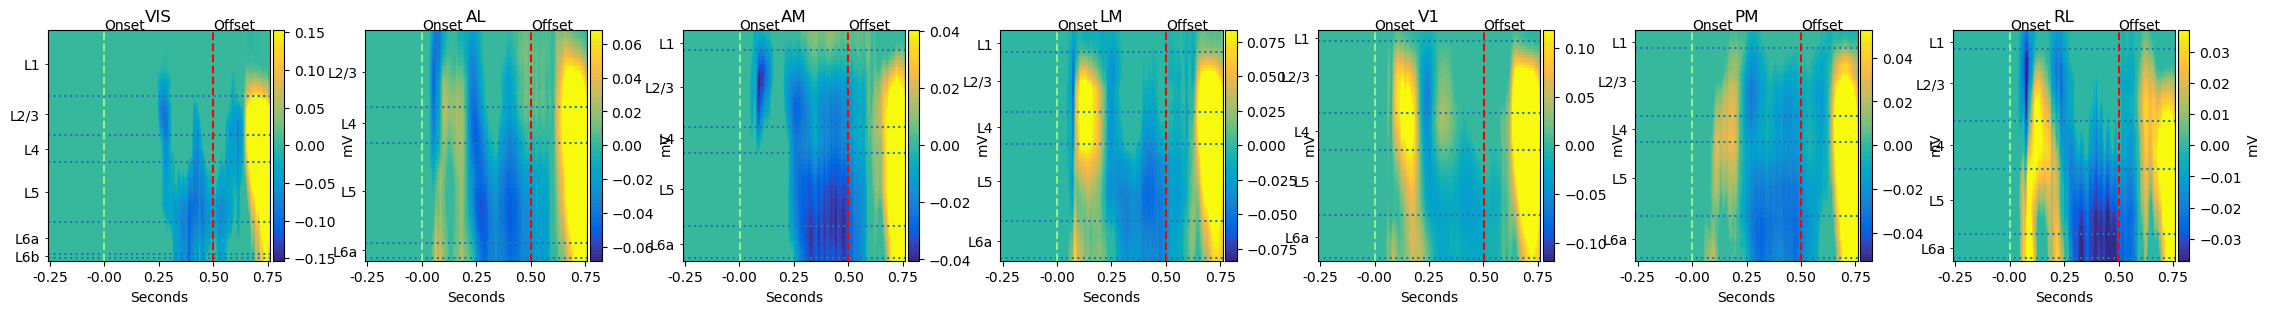

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


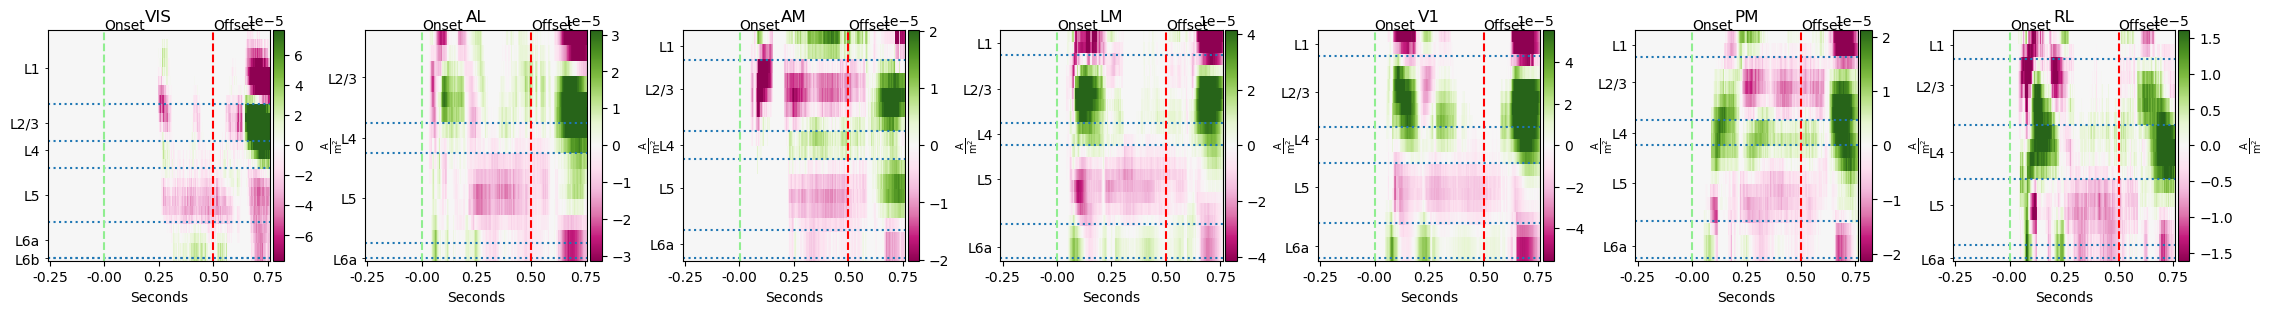

INFO:root:Plotted grand cluster-corrected test contrasts for logo


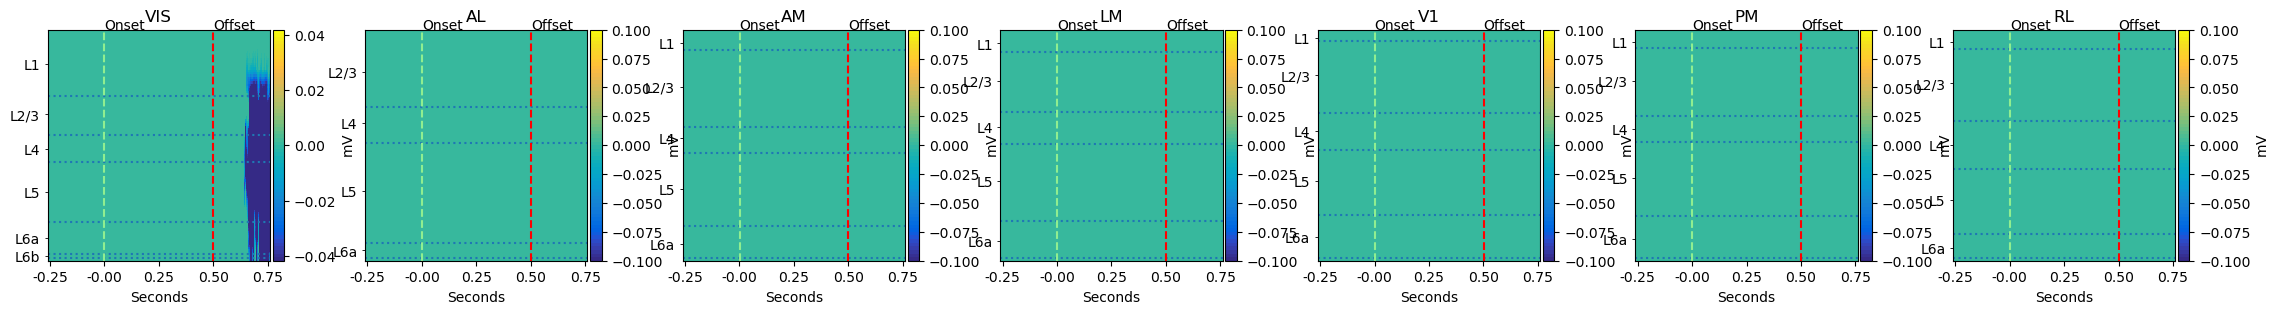

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


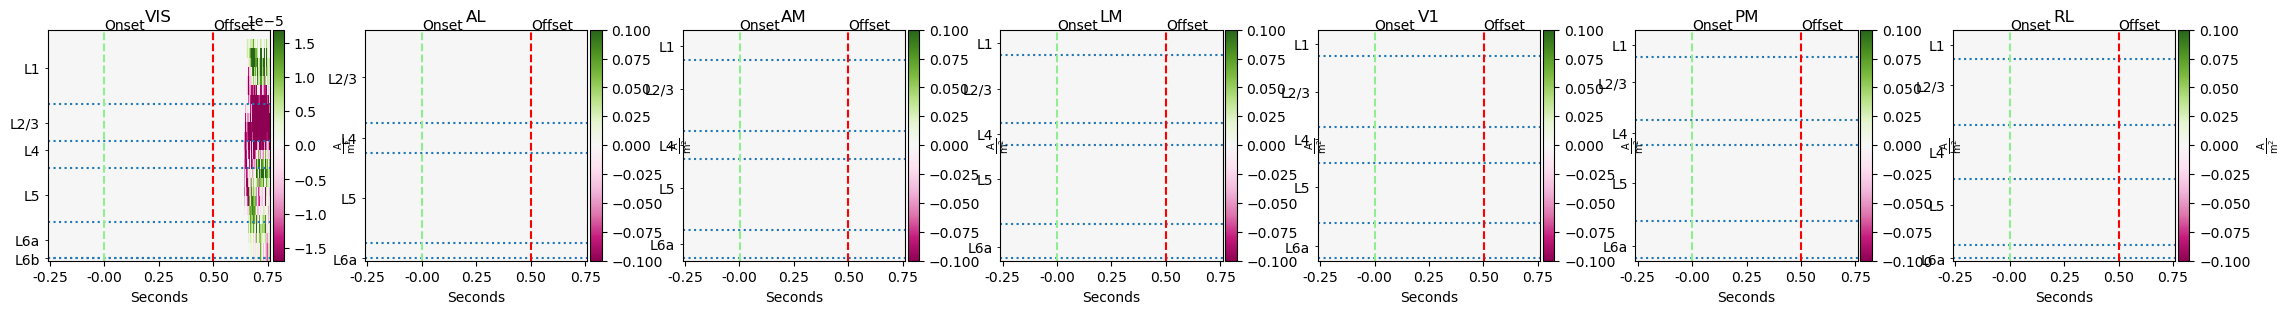

INFO:root:Plotted grand cluster-corrected test contrasts for go_contrast


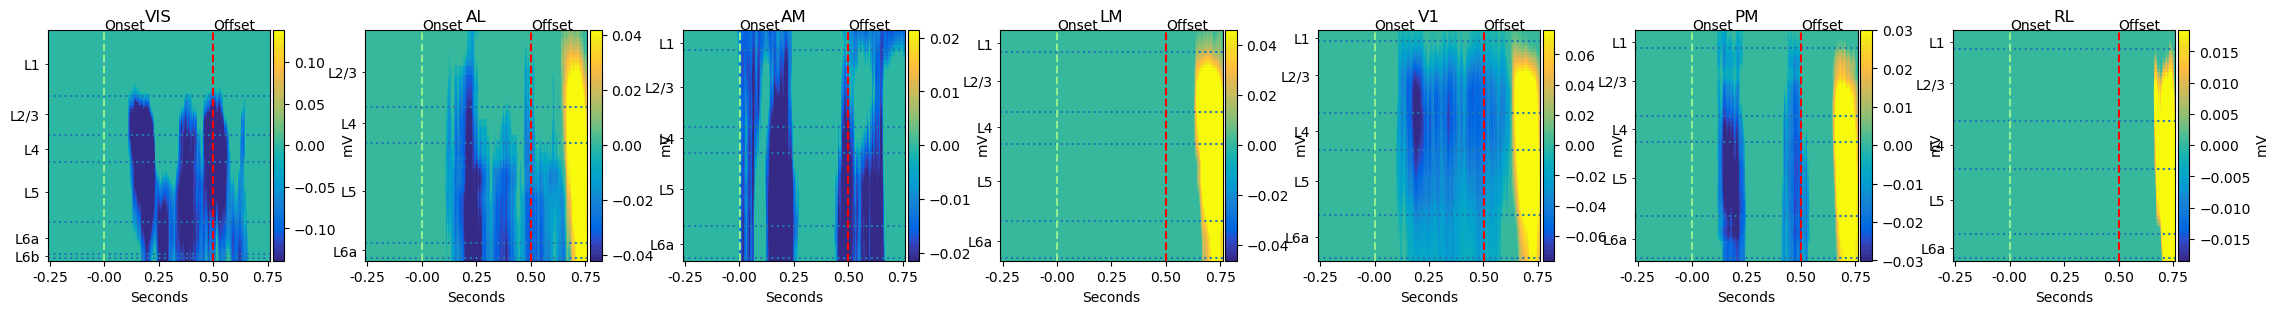

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


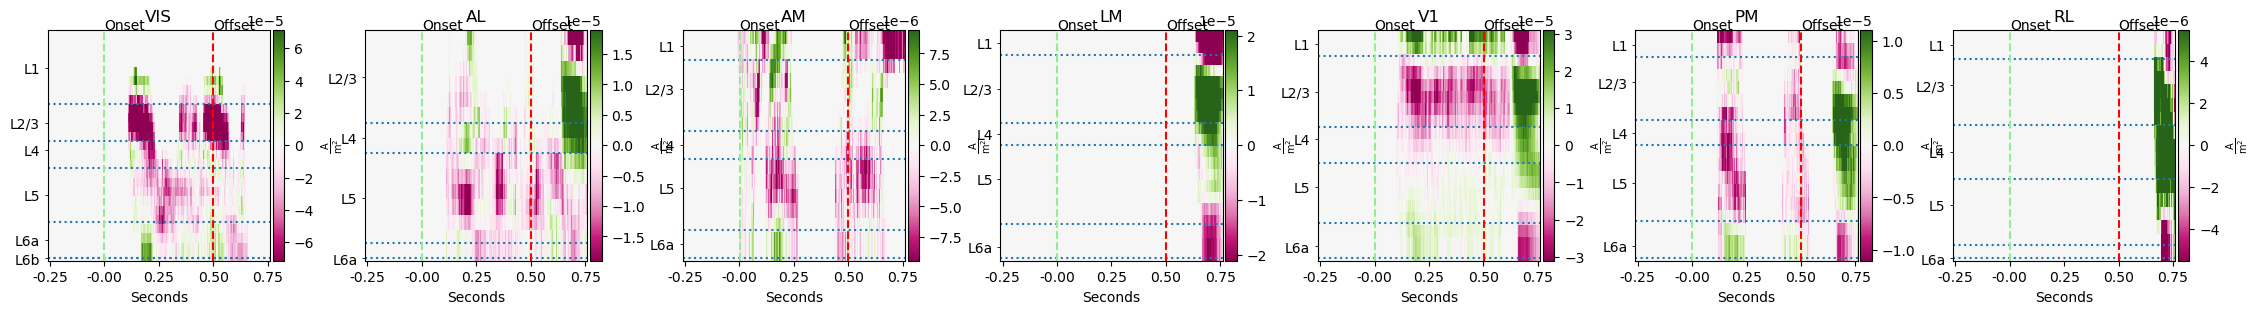

INFO:root:Plotted grand cluster-corrected test contrasts for lo_contrast


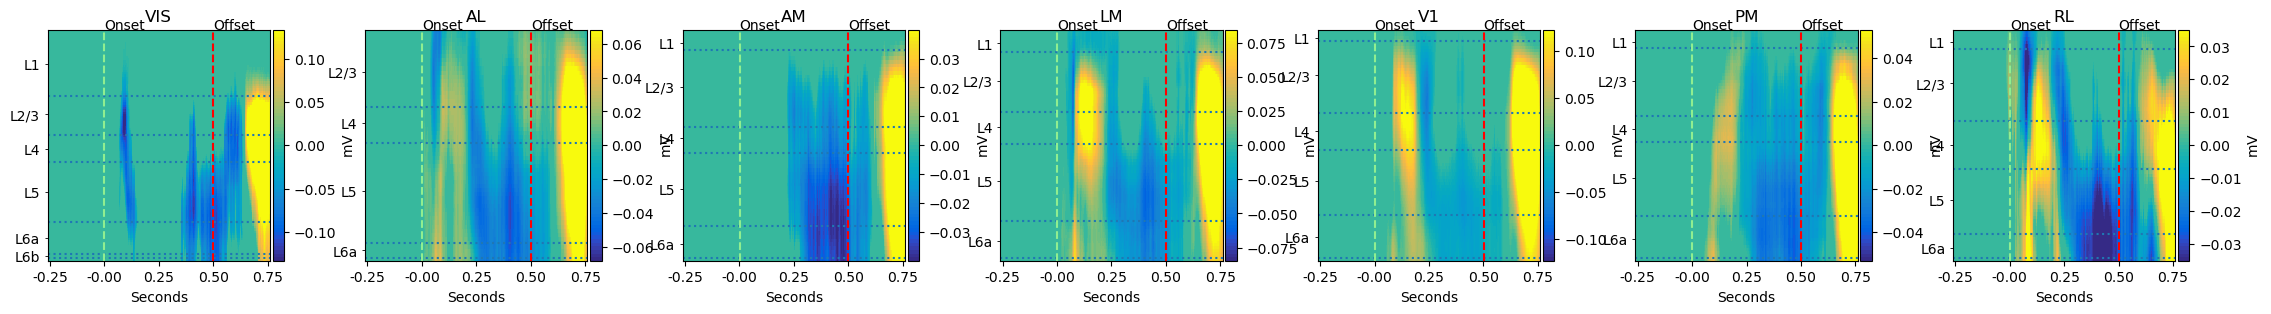

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


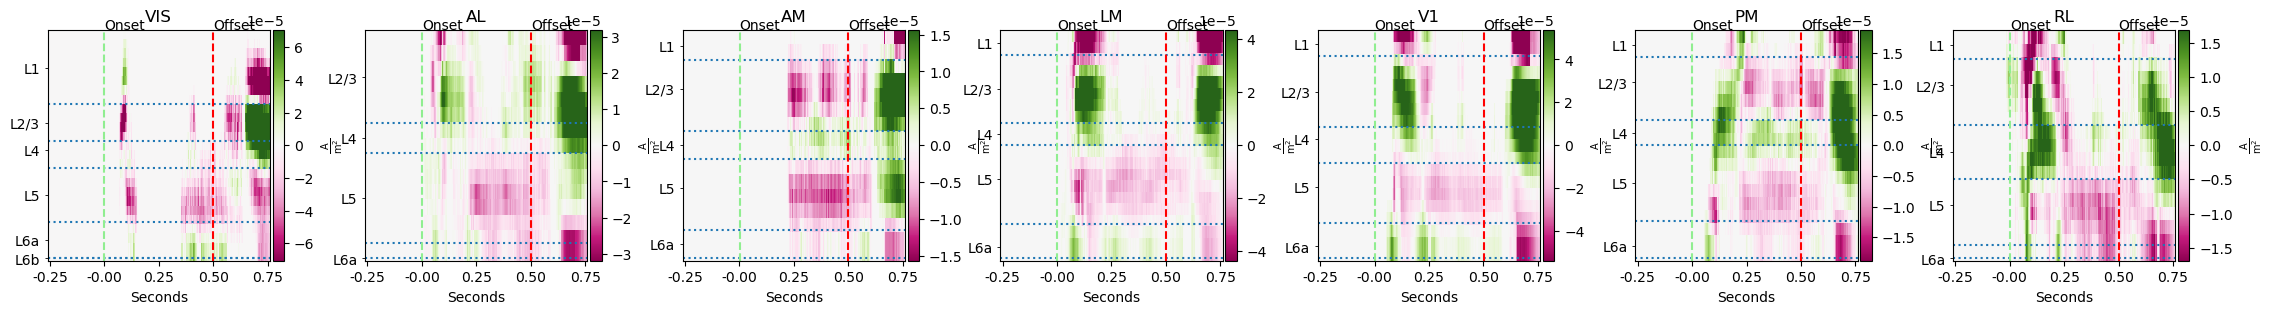

INFO:root:Plotted grand cluster-corrected test contrasts for ssa


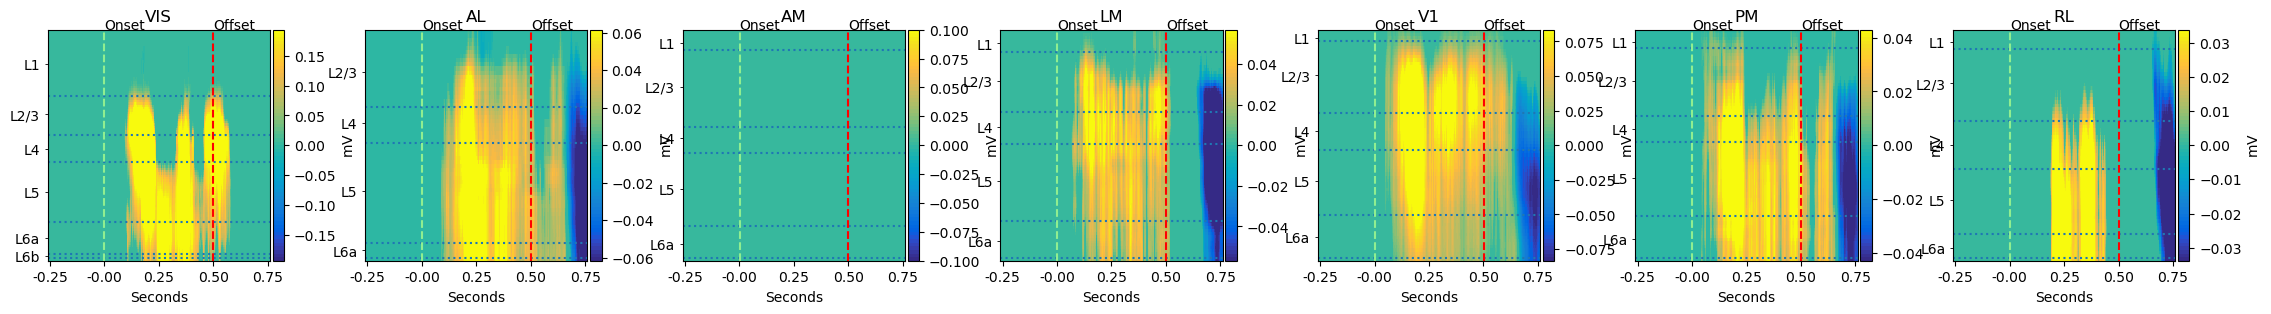

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


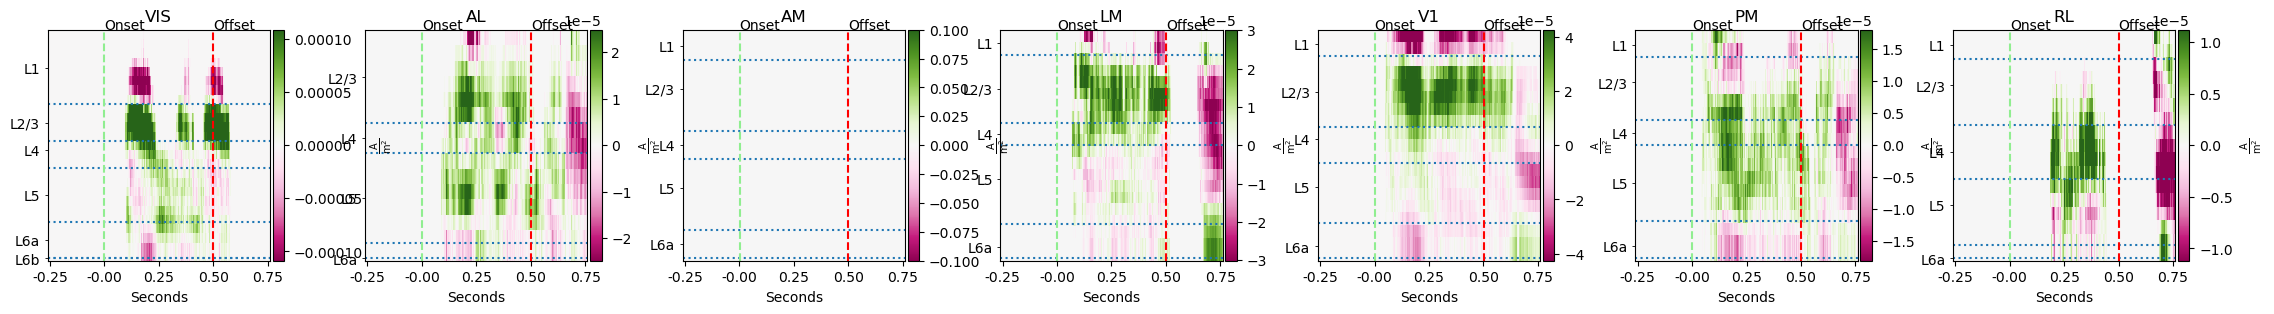

INFO:root:Plotted grand cluster-corrected test contrasts for dd


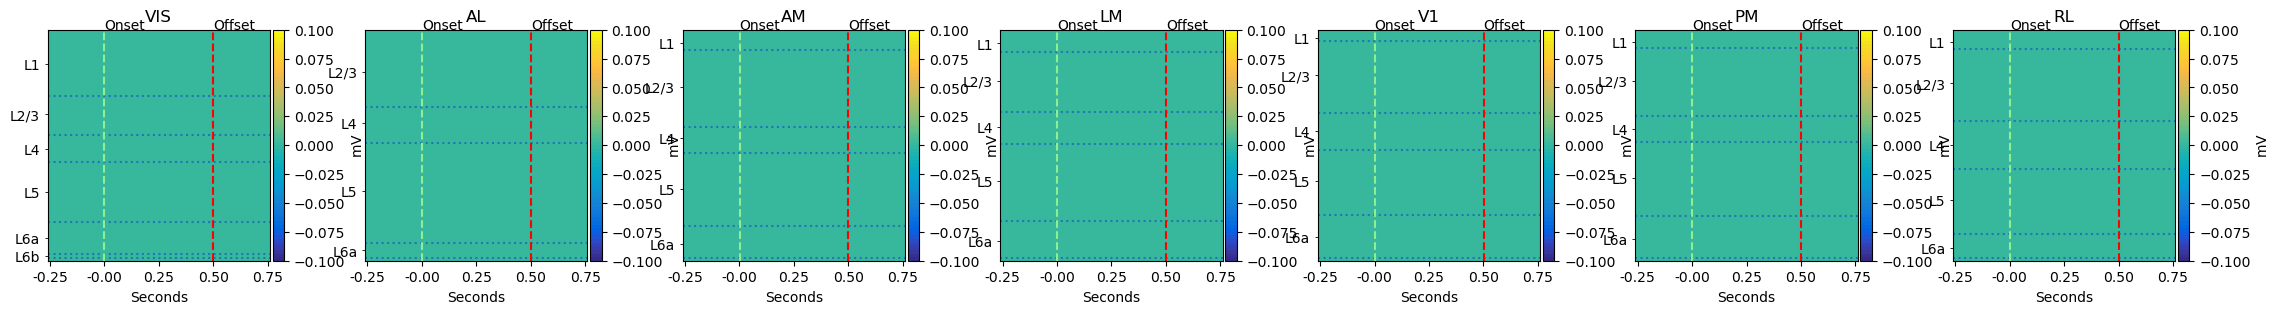

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]


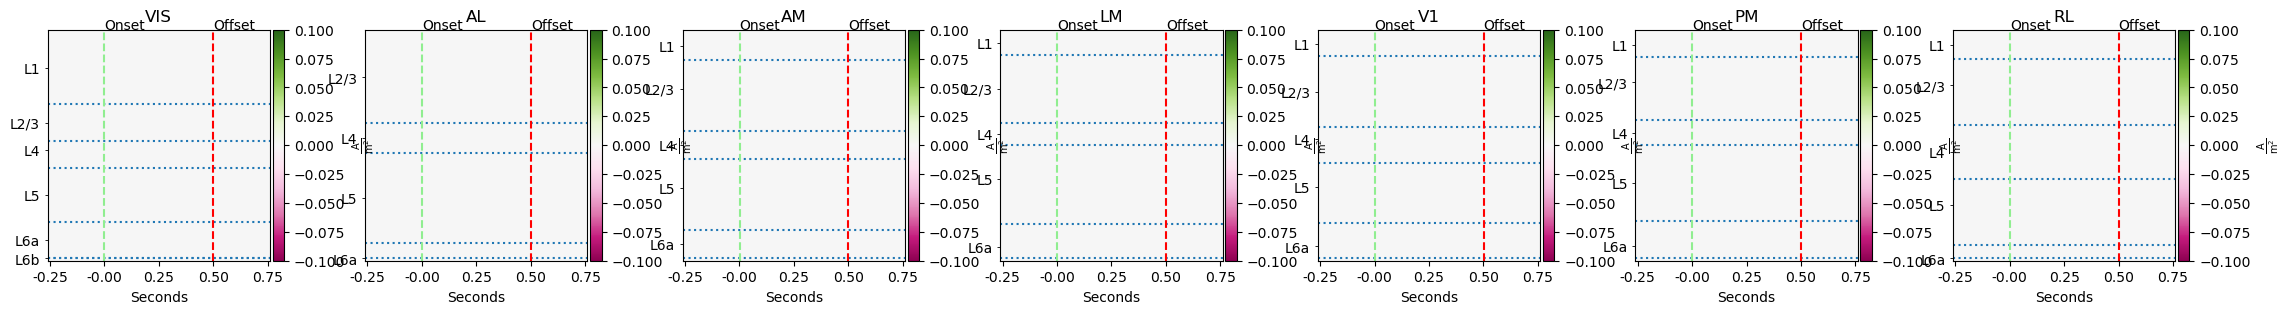

INFO:root:Plotted grand cluster-corrected test contrasts for gonaive_contrast


In [22]:
for (name, condl, condr) in CONTRASTS:
    summaries[name].plot(figure=name + "_4minus3_05_all_lfps.svg", stattitle=stattitle, events=EVENTS)

    summaries[name].plot(cmap='PiYG', fmask=lambda mask: mask[::4, :], fsig=lambda sig: sig.downsample(4).current_source_density(depth_column="vertical"),
                         figure=name + "_4minus3_05_all_csds.svg", stattitle=stattitle, events=EVENTS)
    logging.info("Plotted grand cluster-corrected test contrasts for %s" % name)

In [23]:
for (name, _, _) in CONTRASTS:
    summaries[name].pickle("/mnt/data/DRAFT/000253/" + name + '_4minus3_05')